<a href="#">
    <img alt="Caixa SINAPI logo" src="./img/sinapi_logo.jpg" style="height:140px; align:left">
</a>

# Composições de custos analíticas

<h1>Contexto</h1>

Tratamento de dados de composições de custo unitário, para uso em um [bot do telegram](https://github.com/thiagorlopes/seduc-bot) para engenheiros orçamentistas e fiscais de obra da SEDUC-GO. O relatório foi construído a partir de 3 fontes de composições analíticas. A primeira delas consiste na [SINAPI DEZ/2020](https://www.caixa.gov.br/poder-publico/modernizacao-gestao/sinapi/referencias-precos-insumos/Paginas/default.aspx). A segunda fonte se refere aos dados publicados pela tabela de referência [GOINFRA NOV/2020](http://www.goinfra.go.gov.br/Tabela-de-Composicao/114). Por fim, também foram inseridas composições elaboradas pela [Secretaria de Estado da Educação (SEE-GO)](http://seduc.go.gov.br/). Todos os preços são DESONERADOS e referentes ao estado de Goiás.


<h2>Sumário</h2>

1. [Introdução](#intro)
2. [Análise exploratória](#data_exploration)<br>
    1. [Qual a estrutura dos datasets?](#data_structure)<br>
        1. [Composições sintéticas GOINFRA](#goinfra_sintetica_structure)<br>
        2. [Composições analíticas GOINFRA](#goinfra_analitica_structure)<br>
        3. [Composições analíticas SINAPI](#sinapi_analitica_structure)<br>
    2. [Há inconsistências nos dados disponíveis?](#data_inconsistency)<br>
        1. [Composições sintéticas GOINFRA](#goinfra_sintetica_inconsistency)<br>
        2. [Composições_analíticas_GOINFRA](#goinfra_analitica_inconsistency)<br>
        3. [Composições analíticas SINAPI](#sinapi_analitica_inconsistency)<br>
    3. [Tratamento de dados](#data_cleaning)<br>
        1. [Composições sintéticas GOINFRA](#goinfra_sintetica_cleaning)<br>
        2. [Composições analíticas GOINFRA](#goinfra_analitica_cleaning)<br>
        3. [Composições sintéticas SINAPI](#sinapi_sintetica_cleaning)<br>
        4. [Composições analíticas SINAPI](#sinapi_analitica_cleaning)<br>
4. [Conclusão](#conclusion)

# 2 Análise Exploratória <a id="data_exploration"></a>

#### Importação de bibliotecas

Dada sua elevada flexibilidade e capacidade de processamento, optou-se por analisar os dados com a biblioteca pandas.

In [1]:
import pandas as pd
from utils import helpers

#### Arquivos fonte

A cada atualização publicada pelo órgãos, os arquivos devem ser substituídos na pasta app/data.

In [2]:
goinfra_sintetica_filepath = "./data/goinfra-composicoes-sinteticas-11.2020.xls"
goinfra_analitica_filepath = "./data/goinfra-composicoes-analiticas-11.2020.xls"
sinapi_analitica_filepath = "./data/sinapi-composicoes-analiticas-12.2020.xls"

### 2.1 Qual a estrutura dos datasets?<a id="data_structure"></a>

#### a. Composições sintéticas GOINFRA<a id="goinfra_sintetica_structure"></a>

Devido à estrutura do arquivo em excel, as 6 primeiras linhas são desconsideradas.

In [3]:
goinfra_sintetica = pd.read_excel(goinfra_sintetica_filepath, skiprows=6)
goinfra_sintetica

,CODIGO DA COMPOSICAO,DESCRICAO DA COMPOSICAO,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,UNIDADE,Unnamed: 7,CUSTO MATERIAL,CUSTO MAO DE OBRA,Unnamed: 10,CUSTO TOTAL
0,164,SERVIÇOS PRELIMINARES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,020000,SERVIÇOS PRELIMINARES,NaN,NaN,NaN,NaN,S/U,NaN,0.00,0.00,NaN,0.00
2,020100,DEMOLIÇÃO MANUAL - COBERTURA TELHA METÁLICA C/...,NaN,NaN,NaN,NaN,m2,NaN,0.00,2.33,NaN,2.33
3,020101,DEMOLICAO MANUAL COBERTURA TELHA CERAMICA C/ T...,NaN,NaN,NaN,NaN,m2,NaN,0.00,3.73,NaN,3.73
4,020102,DEMOLICAO MANUAL COBERTURA TELHA FIBROCIMENTO/...,NaN,NaN,NaN,NaN,m2,NaN,0.00,2.07,NaN,2.07
...,...,...,...,...,...,...,...,...,...,...,...,...
2031,271851,LETRA CAIXA INOX COLOCADA,NaN,NaN,NaN,NaN,m,NaN,377.93,0.00,NaN,377.93
2032,271852,LETRA CAIXA INOX ESCOVADO COLOCADA,NaN,NaN,NaN,NaN,m,NaN,464.31,0.00,NaN,464.31
2033,271853,LETRA CAIXA LATAO AMARELO COLOCADA,NaN,NaN,NaN,NaN,m,NaN,583.09,0.00,NaN,583.09
2034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Há 2036 linhas e 12 colunas.

#### b. Composições analíticas GOINFRA<a id="goinfra_analitica_structure"></a>

A leitura do arquivo de composições analíticas da GOINFRA é apresentada a seguir.

In [4]:
goinfra_analitica = pd.read_excel(goinfra_analitica_filepath)
goinfra_analitica

,CODIGO DA COMPOSICAO,CODIGO ITEM,DESCRIÇÃO ITEM,UNIDADE ITEM,COEFICIENTE,CUSTO TOTAL.1
0,20100,0004,PEDREIRO,h,0.0225,0.32
1,20100,0005,SERVENTE,h,0.2250,2.01
2,20101,0005,SERVENTE,h,0.3600,3.21
3,20101,0004,PEDREIRO,h,0.0360,0.52
4,20102,0004,PEDREIRO,h,0.0200,0.29
...,...,...,...,...,...,...
9482,271803,2500,LADRILHO HIDRAULICO DUAS CORES,m2,1.0500,53.16
9483,271850,2671,LETRA CX.CHAPA GALV.PINT.COLOCADA (ALT.LETRAXN...,m,1.0000,313.14
9484,271851,2670,LETRA CAIXA INOX COLOCADA (ALT.LETRASXNUMERO ...,m,1.0000,377.93
9485,271852,2683,LETRA CX.INOX ESCOVADO COLOCADA(ALTURA LETRASX...,m,1.0000,464.31


Observam-se 9487 linhas e 6 colunas. A coluna 'CODIGO DA COMPOSICAO' será usada posteriormente como chave para busca de composições analíticas.

#### c. Composições analíticas SINAPI<a id="sinapi_analitica_structure"></a>

As colunas se iniciam a partir da 6ª linha, logo as 5 primeiras são desconsideradas.

In [5]:
sinapi_analitica = pd.read_excel(sinapi_analitica_filepath, skiprows=5)
sinapi_analitica.head()

,DESCRICAO DA CLASSE,SIGLA DA CLASSE,DESCRICAO DO TIPO 1,SIGLA DO TIPO 1,CODIGO DO AGRUPADOR,DESCRICAO DO AGRUPADOR,CODIGO DA COMPOSICAO,DESCRICAO DA COMPOSICAO,UNIDADE,ORIGEM DE PREÇO,...,CUSTO MATERIAL,% MATERIAL,CUSTO EQUIPAMENTO,% EQUIPAMENTO,CUSTO SERVICOS TERCEIROS,% SERVICOS TERCEIROS,CUSTO OUTROS,% OUTROS,% ATRIBUÍDO SÃO PAULO,VINCULO
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,ASSENTAMENTO DE TUBOS E PECAS,ASTU,FORNEC E/OU ASSENT DE TUBO DE FERRO FUNDIDO JUNTA,45.0,NaN,NaN,97141,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,ATRIBUÍDO SÃO PAULO,...,"1,28","18,7406296","1,15","16,9415292","0,00","0,0000000","0,00","0,0000000",0.16667,CAIXA REFERENCIAL
2,ASSENTAMENTO DE TUBOS E PECAS,ASTU,FORNEC E/OU ASSENT DE TUBO DE FERRO FUNDIDO JUNTA,45.0,NaN,NaN,97141,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,ATRIBUÍDO SÃO PAULO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAIXA REFERENCIAL
3,ASSENTAMENTO DE TUBOS E PECAS,ASTU,FORNEC E/OU ASSENT DE TUBO DE FERRO FUNDIDO JUNTA,45.0,NaN,NaN,97141,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,ATRIBUÍDO SÃO PAULO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAIXA REFERENCIAL
4,ASSENTAMENTO DE TUBOS E PECAS,ASTU,FORNEC E/OU ASSENT DE TUBO DE FERRO FUNDIDO JUNTA,45.0,NaN,NaN,97141,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,ATRIBUÍDO SÃO PAULO,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,CAIXA REFERENCIAL


In [6]:
sinapi_analitica.shape

(42052, 31)

Há um total de 42.052 linhas e 31 colunas, cujos nomes são apresentados abaixo.

In [7]:
sinapi_analitica.columns.values

array(['DESCRICAO DA CLASSE', 'SIGLA DA CLASSE', 'DESCRICAO DO TIPO 1',
       'SIGLA DO TIPO 1', 'CODIGO DO AGRUPADOR', 'DESCRICAO DO AGRUPADOR',
       'CODIGO DA COMPOSICAO', 'DESCRICAO DA COMPOSICAO', 'UNIDADE',
       'ORIGEM DE PREÇO', 'CUSTO TOTAL', 'TIPO ITEM', 'CODIGO ITEM',
       'DESCRIÇÃO ITEM', 'UNIDADE ITEM', 'ORIGEM DE PREÇO ITEM',
       'COEFICIENTE', 'PRECO UNITARIO', 'CUSTO TOTAL.1',
       'CUSTO MAO DE OBRA', '% MAO DE OBRA', 'CUSTO MATERIAL',
       '% MATERIAL', 'CUSTO EQUIPAMENTO', '% EQUIPAMENTO',
       'CUSTO SERVICOS TERCEIROS', '% SERVICOS TERCEIROS', 'CUSTO OUTROS',
       '% OUTROS', '% ATRIBUÍDO SÃO PAULO', 'VINCULO'], dtype=object)

Nem todas colunas são relevantes para a presente análise. Apenas as colunas referentes à códigos, descrições e preços serão mantidas.

### 2.2 Há inconsistências no conjunto de dados?<a id="data_inconsistency"></a>

#### a. Composições sintéticas GOINFRA<a id="goinfra_sintetica_inconsistency"></a>

##### Dados nulos

Procedeu-se à investigação quanto à quantidade de dados nulos no conjunto de dados.

In [8]:
goinfra_sintetica.isna().sum()

CODIGO DA COMPOSICAO          1
DESCRICAO DA COMPOSICAO       2
Unnamed: 2                 2036
Unnamed: 3                 2036
Unnamed: 4                 2036
Unnamed: 5                 2035
UNIDADE                      89
Unnamed: 7                 2036
CUSTO MATERIAL               28
CUSTO MAO DE OBRA            28
Unnamed: 10                2036
CUSTO TOTAL                  28
dtype: int64

Observa-se uma quantidade significativa de colunas vazias. Isso se deve ao fato de que o arquivo de excel apresenta mesclagem de diversas colunas. Desse modo, as colunas cujo nome contenha 'Unnamed' serão removidas.

A tabela abaixo apresenta as linhas com valores nulos para a coluna 'UNIDADE'.

In [9]:
goinfra_sintetica[goinfra_sintetica['UNIDADE'].isna()].reset_index()

,index,CODIGO DA COMPOSICAO,DESCRICAO DA COMPOSICAO,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,UNIDADE,Unnamed: 7,CUSTO MATERIAL,CUSTO MAO DE OBRA,Unnamed: 10,CUSTO TOTAL
0,0,164,SERVIÇOS PRELIMINARES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,83,165,TRANSPORTES,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,84,030000,TRANSPORTES,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0
3,94,166,SERVIÇO EM TERRA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,95,040000,SERVICO EM TERRA,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
84,1889,260000,PINTURA,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0
85,1941,189,DIVERSOS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,1942,270000,DIVERSOS,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,0.0
87,2034,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


O número de linhas com valor nulo coincide com o encontrado anteriormente para a coluna 'UNIDADE'. As linhas em que essa coluna tenha valor nulo serão removidas durante o tratamento de dados. É razoável supor que linhas com valores nulos nas colunas 'CODIGO DA COMPOSICAO', 'DESCRICAO DA COMPOSICAO', 'CUSTO MATERIAL', 'CUSTO MAO DE OBRA' e 'CUSTO TOTAL' também serão removidas com esse procedimento.

##### Tipos de variáveis

Os tipos de cada variável são apresentados a seguir.

In [10]:
goinfra_sintetica.dtypes

CODIGO DA COMPOSICAO        object
DESCRICAO DA COMPOSICAO     object
Unnamed: 2                 float64
Unnamed: 3                 float64
Unnamed: 4                 float64
Unnamed: 5                  object
UNIDADE                     object
Unnamed: 7                 float64
CUSTO MATERIAL             float64
CUSTO MAO DE OBRA          float64
Unnamed: 10                float64
CUSTO TOTAL                float64
dtype: object

É sabido que os códigos de composições sintéticas da GOINFRA são estritamente numéricos. Logo, há necessidade de convertê-los para int.

#### b. Composições analíticas GOINFRA<a id="goinfra_analitica_inconsistency"></a>

##### Dados nulos

Procedeu-se à investigação quanto à presença de valores nulos nos dados em questão.

In [11]:
goinfra_analitica.describe()

,CODIGO DA COMPOSICAO,COEFICIENTE,CUSTO TOTAL.1
count,9487.000000,9487.000000,9487.000000
mean,120916.831243,5.277379,57.832741
std,77220.560709,46.247697,699.643946
min,20100.000000,0.000100,0.000000
25%,71145.500000,0.130750,1.180000
50%,81571.000000,0.530000,3.920000
75%,180380.000000,1.020000,16.655000
max,271853.000000,1817.090000,40676.070000


In [12]:
goinfra_analitica.isna().sum()

CODIGO DA COMPOSICAO    0
CODIGO ITEM             0
DESCRIÇÃO ITEM          0
UNIDADE ITEM            0
COEFICIENTE             0
CUSTO TOTAL.1           0
dtype: int64

Não foram encontrados valores nulos, logo não há necessidade de eliminação de linhas a priori.

##### Tipos de variáveis

Os tipos de cada variável são apresentados abaixo.

In [13]:
goinfra_analitica.dtypes

CODIGO DA COMPOSICAO      int64
CODIGO ITEM              object
DESCRIÇÃO ITEM           object
UNIDADE ITEM             object
COEFICIENTE             float64
CUSTO TOTAL.1           float64
dtype: object

Pode-se dizer que os tipos são compatíveis com o esperado para cada variável. Os códigos das composições são numéricos. Enquanto isso, o código de item pode se mostrar na forma de texto (ex.: H689) o que justifica o tipo 'object'.

#### c. Composições analíticas SINAPI<a id="sinapi_analitica_inconsistency"></a>

##### Dados nulos

As quantidades de valores nulos presentes no conjunto de dados são apresentadas abaixo.

In [14]:
sinapi_analitica.isna().sum()

DESCRICAO DA CLASSE             1
SIGLA DA CLASSE                 1
DESCRICAO DO TIPO 1             1
SIGLA DO TIPO 1                 1
CODIGO DO AGRUPADOR         41893
DESCRICAO DO AGRUPADOR      41893
CODIGO DA COMPOSICAO            1
DESCRICAO DA COMPOSICAO         1
UNIDADE                         1
ORIGEM DE PREÇO                 1
CUSTO TOTAL                     1
TIPO ITEM                    6814
CODIGO ITEM                  6814
DESCRIÇÃO ITEM               6814
UNIDADE ITEM                 6814
ORIGEM DE PREÇO ITEM         6814
COEFICIENTE                  6814
PRECO UNITARIO               6814
CUSTO TOTAL.1                6814
CUSTO MAO DE OBRA           35239
% MAO DE OBRA               35239
CUSTO MATERIAL              35239
% MATERIAL                  35239
CUSTO EQUIPAMENTO           35239
% EQUIPAMENTO               35239
CUSTO SERVICOS TERCEIROS    35239
% SERVICOS TERCEIROS        35239
CUSTO OUTROS                35239
% OUTROS                    35239
% ATRIBUÍDO SÃ

Pode-se presumir que a elevada quantidade de valores nulos se deva ao fato de que as composições sintéticas e analíticas são dispostas no mesmo arquivo. Desse modo, faz-se necessário um tratamento de dados. Em primeiro lugar, deve-se obter a lista de composições sintéticas a partir da eliminação de duplicatas. Além disso, apenas algumas colunas devem ser extraídas, tanto para a tabela sintética quanto a analítica.

##### Tipos de variáveis

Os tipos de cada variável são apresentados a seguir.

In [15]:
sinapi_analitica.dtypes

DESCRICAO DA CLASSE          object
SIGLA DA CLASSE              object
DESCRICAO DO TIPO 1          object
SIGLA DO TIPO 1             float64
CODIGO DO AGRUPADOR         float64
DESCRICAO DO AGRUPADOR       object
CODIGO DA COMPOSICAO         object
DESCRICAO DA COMPOSICAO      object
UNIDADE                      object
ORIGEM DE PREÇO              object
CUSTO TOTAL                  object
TIPO ITEM                    object
CODIGO ITEM                 float64
DESCRIÇÃO ITEM               object
UNIDADE ITEM                 object
ORIGEM DE PREÇO ITEM         object
COEFICIENTE                  object
PRECO UNITARIO               object
CUSTO TOTAL.1                object
CUSTO MAO DE OBRA            object
% MAO DE OBRA                object
CUSTO MATERIAL               object
% MATERIAL                   object
CUSTO EQUIPAMENTO            object
% EQUIPAMENTO                object
CUSTO SERVICOS TERCEIROS     object
% SERVICOS TERCEIROS         object
CUSTO OUTROS                

Vale ressaltar que o código da composição é do tipo objeto, tendo em vista que podem existir valores na forma de texto (ex. 74291/1). A coluna 'CODIGO ITEM' deveria ser do tipo int. Por fim, as colunas de custo deveriam ser do tipo float.

# 3. Tratamento de dados <a id="data_cleaning"></a>

### a. Composições sintéticas GOINFRA <a id="handle_goinfra_sintetica"></a>

#### Eliminação de dados nulos

Primeiramente, foi efetuada a eliminação das colunas que contenham o text 'Unnamed' em seu título.

In [16]:
goinfra_sintetica.drop(goinfra_sintetica.columns[goinfra_sintetica.columns.str.contains('Unnamed',case = False)],axis = 1, inplace = True)
goinfra_sintetica.reset_index(drop=True, inplace=True)
goinfra_sintetica

,CODIGO DA COMPOSICAO,DESCRICAO DA COMPOSICAO,UNIDADE,CUSTO MATERIAL,CUSTO MAO DE OBRA,CUSTO TOTAL
0,164,SERVIÇOS PRELIMINARES,NaN,NaN,NaN,NaN
1,020000,SERVIÇOS PRELIMINARES,S/U,0.00,0.00,0.00
2,020100,DEMOLIÇÃO MANUAL - COBERTURA TELHA METÁLICA C/...,m2,0.00,2.33,2.33
3,020101,DEMOLICAO MANUAL COBERTURA TELHA CERAMICA C/ T...,m2,0.00,3.73,3.73
4,020102,DEMOLICAO MANUAL COBERTURA TELHA FIBROCIMENTO/...,m2,0.00,2.07,2.07
...,...,...,...,...,...,...
2031,271851,LETRA CAIXA INOX COLOCADA,m,377.93,0.00,377.93
2032,271852,LETRA CAIXA INOX ESCOVADO COLOCADA,m,464.31,0.00,464.31
2033,271853,LETRA CAIXA LATAO AMARELO COLOCADA,m,583.09,0.00,583.09
2034,NaN,NaN,NaN,NaN,NaN,NaN


No entanto, ainda há valores nulos a serem eliminados.

In [17]:
goinfra_sintetica.isna().sum()

CODIGO DA COMPOSICAO        1
DESCRICAO DA COMPOSICAO     2
UNIDADE                    89
CUSTO MATERIAL             28
CUSTO MAO DE OBRA          28
CUSTO TOTAL                28
dtype: int64

Tendo em vista que a coluna unidade possui a maior quantidade de linhas com valores nulos, optou-se por eliminá-las.

In [18]:
goinfra_sintetica.dropna(subset=['UNIDADE'], inplace=True)

A seguir, é feita uma nova verificação de valores nulos.

In [19]:
goinfra_sintetica.isna().sum()

CODIGO DA COMPOSICAO       0
DESCRICAO DA COMPOSICAO    0
UNIDADE                    0
CUSTO MATERIAL             0
CUSTO MAO DE OBRA          0
CUSTO TOTAL                0
dtype: int64

É possível perceber que todas as linhas com valores nulos foram devidamente tratadas.

#### Conversão de tipo

A coluna de código deve ser convertida para int.

In [20]:
goinfra_sintetica[['CODIGO DA COMPOSICAO']] = goinfra_sintetica[['CODIGO DA COMPOSICAO']].astype(int)

In [21]:
goinfra_sintetica.dtypes

CODIGO DA COMPOSICAO         int64
DESCRICAO DA COMPOSICAO     object
UNIDADE                     object
CUSTO MATERIAL             float64
CUSTO MAO DE OBRA          float64
CUSTO TOTAL                float64
dtype: object

Os dados acima indicam que a conversão foi bem sucedida.

### b. Composições analíticas GOINFRA <a id="handle_goinfra_analitica"></a>

#### Mesclagem de tabelas

Conforme indicado anteriormente, não há necessidade, iniciamente, de efetuar tratamento de dados nas composições analíticas da GOINFRA. No entanto, optou-se por efetuar a mesclagem das tabelas sintética e analítica. 

In [22]:
goinfra_analitica = pd.merge(goinfra_sintetica[['CODIGO DA COMPOSICAO', 'DESCRICAO DA COMPOSICAO']],
                 goinfra_analitica, 
                 on='CODIGO DA COMPOSICAO',
                 how='left')
goinfra_analitica

,CODIGO DA COMPOSICAO,DESCRICAO DA COMPOSICAO,CODIGO ITEM,DESCRIÇÃO ITEM,UNIDADE ITEM,COEFICIENTE,CUSTO TOTAL.1
0,20000,SERVIÇOS PRELIMINARES,NaN,NaN,NaN,NaN,NaN
1,20100,DEMOLIÇÃO MANUAL - COBERTURA TELHA METÁLICA C/...,0004,PEDREIRO,h,0.0225,0.32
2,20100,DEMOLIÇÃO MANUAL - COBERTURA TELHA METÁLICA C/...,0005,SERVENTE,h,0.2250,2.01
3,20101,DEMOLICAO MANUAL COBERTURA TELHA CERAMICA C/ T...,0005,SERVENTE,h,0.3600,3.21
4,20101,DEMOLICAO MANUAL COBERTURA TELHA CERAMICA C/ T...,0004,PEDREIRO,h,0.0360,0.52
...,...,...,...,...,...,...,...
9488,271803,LADRILHO HIDRAULICO DE DUAS CORES (SEM LASTRO),2500,LADRILHO HIDRAULICO DUAS CORES,m2,1.0500,53.16
9489,271850,LETRA CAIXA CHAPA GALVANIZADA PINTADA COLOCADA,2671,LETRA CX.CHAPA GALV.PINT.COLOCADA (ALT.LETRAXN...,m,1.0000,313.14
9490,271851,LETRA CAIXA INOX COLOCADA,2670,LETRA CAIXA INOX COLOCADA (ALT.LETRASXNUMERO ...,m,1.0000,377.93
9491,271852,LETRA CAIXA INOX ESCOVADO COLOCADA,2683,LETRA CX.INOX ESCOVADO COLOCADA(ALTURA LETRASX...,m,1.0000,464.31


#### Eliminação de dados nulos

Após a união das duas tabelas, itens nulos foram introduzidos, os quais são apresentados abaixo.

In [23]:
goinfra_analitica.loc[goinfra_analitica['CODIGO ITEM'].isnull()]

,CODIGO DA COMPOSICAO,DESCRICAO DA COMPOSICAO,CODIGO ITEM,DESCRIÇÃO ITEM,UNIDADE ITEM,COEFICIENTE,CUSTO TOTAL.1
0,20000,SERVIÇOS PRELIMINARES,NaN,NaN,NaN,NaN,NaN
1154,67000,RECUPERAÇÃO E TRATAMENTO EM ESTRUTURAS DE CONC...,NaN,NaN,NaN,NaN,NaN
3803,80000,INSTALAÇÕES HIDROSSANITÁRIAS,NaN,NaN,NaN,NaN,NaN
4752,81580,PLUG,NaN,NaN,NaN,NaN,NaN
6659,180000,ESQUADRIAS METÁLICAS - ( OBS.: 1- OS VIDROS NÃ...,NaN,NaN,NaN,NaN,NaN
8253,250000,ADMINISTRAÇÃO - MENSALISTAS,NaN,NaN,NaN,NaN,NaN


Decidiu-se eliminar as linhas com valores nulos.

In [24]:
goinfra_analitica.dropna(inplace=True)
goinfra_analitica.isna().sum()

CODIGO DA COMPOSICAO       0
DESCRICAO DA COMPOSICAO    0
CODIGO ITEM                0
DESCRIÇÃO ITEM             0
UNIDADE ITEM               0
COEFICIENTE                0
CUSTO TOTAL.1              0
dtype: int64

Após o tratamento, não há mais linhas nulas nas composições analíticas da goinfra.

### c. Composições sintéticas SINAPI <a id="handle_sinapi_sintetica"></a>

#### Segmentação de colunas

Apenas as colunas de código, descrição, unidade e custo total são relevantes para as composições sintéticas.

In [25]:
sinapi_sintetica = sinapi_analitica[['CODIGO DA COMPOSICAO', 'DESCRICAO DA COMPOSICAO', 'UNIDADE', 'CUSTO TOTAL']].dropna()
sinapi_sintetica

,CODIGO DA COMPOSICAO,DESCRICAO DA COMPOSICAO,UNIDADE,CUSTO TOTAL
1,97141,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,"6,84"
2,97141,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,"6,84"
3,97141,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,"6,84"
4,97141,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,"6,84"
5,97141,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,"6,84"
...,...,...,...,...
42047,101460,VIGIA DIURNO COM ENCARGOS COMPLEMENTARES,MES,"2.520,79"
42048,101460,VIGIA DIURNO COM ENCARGOS COMPLEMENTARES,MES,"2.520,79"
42049,101460,VIGIA DIURNO COM ENCARGOS COMPLEMENTARES,MES,"2.520,79"
42050,101460,VIGIA DIURNO COM ENCARGOS COMPLEMENTARES,MES,"2.520,79"


A tabela acima indica que foi efetuada uma segmentação dos dados. No entanto, há diversos dados duplicados que precisam ser removidos.

#### Eliminação de dados duplicados

A quantidade de itens únicos é apresentada abaixo.

In [26]:
len(sinapi_sintetica['CODIGO DA COMPOSICAO'].unique())

6813

Há um total de 6813 códigos únicos para composições sintéticas.

Os valores duplicados são removidos a seguir.

In [27]:
sinapi_sintetica.drop_duplicates(inplace=True)
sinapi_sintetica.reset_index(drop=True, inplace=True)
sinapi_sintetica

,CODIGO DA COMPOSICAO,DESCRICAO DA COMPOSICAO,UNIDADE,CUSTO TOTAL
0,97141,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,"6,84"
1,97142,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,"7,64"
2,97143,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,"9,64"
3,97144,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,"11,64"
4,97145,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,"13,66"
...,...,...,...,...
6808,101456,TÉCNICO DE LABORATÓRIO E CAMPO DE CONSTRUÇÃO C...,MES,"4.574,30"
6809,101457,TÉCNICO EM SONDAGEM COM ENCARGOS COMPLEMENTARES,MES,"5.107,62"
6810,101458,TELHADOR COM ENCARGOS COMPLEMENTARES,MES,"3.677,78"
6811,101459,VIDRACEIRO COM ENCARGOS COMPLEMENTARES,MES,"3.248,19"


In [28]:
sinapi_sintetica.isna().sum()

CODIGO DA COMPOSICAO       0
DESCRICAO DA COMPOSICAO    0
UNIDADE                    0
CUSTO TOTAL                0
dtype: int64

Após a eliminação dos dados duplicados, os valores nulos também foram removidos.

#### Conversão de tipo

Os tipos para as composições sintéticas são apresentados abaixo.

In [29]:
sinapi_sintetica.dtypes

CODIGO DA COMPOSICAO       object
DESCRICAO DA COMPOSICAO    object
UNIDADE                    object
CUSTO TOTAL                object
dtype: object

Optou-se pela conversão da coluna de custo para float.

In [30]:
sinapi_sintetica['CUSTO TOTAL'] = helpers.convert_decimal_separator(sinapi_sintetica['CUSTO TOTAL'])
sinapi_sintetica

,CODIGO DA COMPOSICAO,DESCRICAO DA COMPOSICAO,UNIDADE,CUSTO TOTAL
0,97141,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,6.84
1,97142,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,7.64
2,97143,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,9.64
3,97144,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,11.64
4,97145,ASSENTAMENTO DE TUBO DE FERRO FUNDIDO PARA RED...,M,13.66
...,...,...,...,...
6808,101456,TÉCNICO DE LABORATÓRIO E CAMPO DE CONSTRUÇÃO C...,MES,4574.30
6809,101457,TÉCNICO EM SONDAGEM COM ENCARGOS COMPLEMENTARES,MES,5107.62
6810,101458,TELHADOR COM ENCARGOS COMPLEMENTARES,MES,3677.78
6811,101459,VIDRACEIRO COM ENCARGOS COMPLEMENTARES,MES,3248.19


In [31]:
sinapi_sintetica.dtypes

CODIGO DA COMPOSICAO        object
DESCRICAO DA COMPOSICAO     object
UNIDADE                     object
CUSTO TOTAL                float64
dtype: object

Constata-se acima que a conversão da coluna de custo foi bem sucedida.

### d. Composições analíticas SINAPI <a id="handle_sinapi_analitica"></a>

##### Segmentação de colunas

Apenas as colunas de códigos, descrição, unidade, coeficiente, preço unitário e custo total são relevantes para nossa análise.

In [32]:
sinapi_analitica.columns.values

array(['DESCRICAO DA CLASSE', 'SIGLA DA CLASSE', 'DESCRICAO DO TIPO 1',
       'SIGLA DO TIPO 1', 'CODIGO DO AGRUPADOR', 'DESCRICAO DO AGRUPADOR',
       'CODIGO DA COMPOSICAO', 'DESCRICAO DA COMPOSICAO', 'UNIDADE',
       'ORIGEM DE PREÇO', 'CUSTO TOTAL', 'TIPO ITEM', 'CODIGO ITEM',
       'DESCRIÇÃO ITEM', 'UNIDADE ITEM', 'ORIGEM DE PREÇO ITEM',
       'COEFICIENTE', 'PRECO UNITARIO', 'CUSTO TOTAL.1',
       'CUSTO MAO DE OBRA', '% MAO DE OBRA', 'CUSTO MATERIAL',
       '% MATERIAL', 'CUSTO EQUIPAMENTO', '% EQUIPAMENTO',
       'CUSTO SERVICOS TERCEIROS', '% SERVICOS TERCEIROS', 'CUSTO OUTROS',
       '% OUTROS', '% ATRIBUÍDO SÃO PAULO', 'VINCULO'], dtype=object)

In [33]:
sinapi_analitica = sinapi_analitica[['CODIGO DA COMPOSICAO', 'CODIGO ITEM', 'DESCRIÇÃO ITEM', 'UNIDADE ITEM', 'COEFICIENTE', 'PRECO UNITARIO', 'CUSTO TOTAL.1']]
sinapi_analitica

,CODIGO DA COMPOSICAO,CODIGO ITEM,DESCRIÇÃO ITEM,UNIDADE ITEM,COEFICIENTE,PRECO UNITARIO,CUSTO TOTAL.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97141,NaN,NaN,NaN,NaN,NaN,NaN
2,97141,5678.0,"RETROESCAVADEIRA SOBRE RODAS COM CARREGADEIRA,...",CHP,"0,0099000","97,30","0,96"
3,97141,5679.0,"RETROESCAVADEIRA SOBRE RODAS COM CARREGADEIRA,...",CHI,"0,0477000","45,41","2,16"
4,97141,20078.0,PASTA LUBRIFICANTE PARA TUBOS E CONEXOES COM J...,UN,"0,0046000","23,15","0,10"
...,...,...,...,...,...,...,...
42047,101460,40864.0,SEGURO - MENSALISTA (COLETADO CAIXA),MES,"1,0000000","11,13","11,13"
42048,101460,41096.0,VIGIA DIURNO (MENSALISTA),MES,"1,0000000","1.673,15","1.673,15"
42049,101460,43479.0,FERRAMENTAS - FAMILIA SERVENTE - MENSALISTA (E...,MES,"1,0000000","76,97","76,97"
42050,101460,43503.0,EPI - FAMILIA SERVENTE - MENSALISTA (ENCARGOS ...,MES,"1,0000000","191,25","191,25"


##### Eliminação de dados nulos

O número de itens nulos é apresentado a seguir.

In [34]:
sinapi_analitica.isna().sum()

CODIGO DA COMPOSICAO       1
CODIGO ITEM             6814
DESCRIÇÃO ITEM          6814
UNIDADE ITEM            6814
COEFICIENTE             6814
PRECO UNITARIO          6814
CUSTO TOTAL.1           6814
dtype: int64

Constata-se a presença de diversos valores nulos, apresentados na tabela abaixo.

In [35]:
sinapi_analitica.loc[sinapi_analitica['CODIGO ITEM'].isnull()]

,CODIGO DA COMPOSICAO,CODIGO ITEM,DESCRIÇÃO ITEM,UNIDADE ITEM,COEFICIENTE,PRECO UNITARIO,CUSTO TOTAL.1
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,97141,NaN,NaN,NaN,NaN,NaN,NaN
7,97142,NaN,NaN,NaN,NaN,NaN,NaN
13,97143,NaN,NaN,NaN,NaN,NaN,NaN
19,97144,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...
42009,101456,NaN,NaN,NaN,NaN,NaN,NaN
42016,101457,NaN,NaN,NaN,NaN,NaN,NaN
42025,101458,NaN,NaN,NaN,NaN,NaN,NaN
42034,101459,NaN,NaN,NaN,NaN,NaN,NaN


Nota-se que as linhas nulas correspondem à primeira linha do dataframe, assim como o número de composições sintéticas SINAPI encontradas anteriormente. Isso é exemplificado pela composição abaixo.

In [36]:
sinapi_analitica.loc[sinapi_analitica['CODIGO DA COMPOSICAO'] == '97141']

,CODIGO DA COMPOSICAO,CODIGO ITEM,DESCRIÇÃO ITEM,UNIDADE ITEM,COEFICIENTE,PRECO UNITARIO,CUSTO TOTAL.1
1,97141,NaN,NaN,NaN,NaN,NaN,NaN
2,97141,5678.0,"RETROESCAVADEIRA SOBRE RODAS COM CARREGADEIRA,...",CHP,"0,0099000","97,30","0,96"
3,97141,5679.0,"RETROESCAVADEIRA SOBRE RODAS COM CARREGADEIRA,...",CHI,"0,0477000","45,41","2,16"
4,97141,20078.0,PASTA LUBRIFICANTE PARA TUBOS E CONEXOES COM J...,UN,"0,0046000","23,15","0,10"
5,97141,88246.0,ASSENTADOR DE TUBOS COM ENCARGOS COMPLEMENTARES,H,"0,0905000","26,45","2,39"
6,97141,88316.0,SERVENTE COM ENCARGOS COMPLEMENTARES,H,"0,0905000","13,67","1,23"


A primeira linha de cada composição analítica corresponde aos dados referentes à composição sintética.

In [37]:
sinapi_analitica.dropna(inplace=True)
sinapi_analitica.reset_index(drop=True, inplace=True)
sinapi_analitica

,CODIGO DA COMPOSICAO,CODIGO ITEM,DESCRIÇÃO ITEM,UNIDADE ITEM,COEFICIENTE,PRECO UNITARIO,CUSTO TOTAL.1
0,97141,5678.0,"RETROESCAVADEIRA SOBRE RODAS COM CARREGADEIRA,...",CHP,"0,0099000","97,30","0,96"
1,97141,5679.0,"RETROESCAVADEIRA SOBRE RODAS COM CARREGADEIRA,...",CHI,"0,0477000","45,41","2,16"
2,97141,20078.0,PASTA LUBRIFICANTE PARA TUBOS E CONEXOES COM J...,UN,"0,0046000","23,15","0,10"
3,97141,88246.0,ASSENTADOR DE TUBOS COM ENCARGOS COMPLEMENTARES,H,"0,0905000","26,45","2,39"
4,97141,88316.0,SERVENTE COM ENCARGOS COMPLEMENTARES,H,"0,0905000","13,67","1,23"
...,...,...,...,...,...,...,...
35233,101460,40864.0,SEGURO - MENSALISTA (COLETADO CAIXA),MES,"1,0000000","11,13","11,13"
35234,101460,41096.0,VIGIA DIURNO (MENSALISTA),MES,"1,0000000","1.673,15","1.673,15"
35235,101460,43479.0,FERRAMENTAS - FAMILIA SERVENTE - MENSALISTA (E...,MES,"1,0000000","76,97","76,97"
35236,101460,43503.0,EPI - FAMILIA SERVENTE - MENSALISTA (ENCARGOS ...,MES,"1,0000000","191,25","191,25"


##### Conversão de tipo

As colunas preço unitário e custo total devem ser convertidas para float.

In [38]:
sinapi_analitica.dtypes

CODIGO DA COMPOSICAO     object
CODIGO ITEM             float64
DESCRIÇÃO ITEM           object
UNIDADE ITEM             object
COEFICIENTE              object
PRECO UNITARIO           object
CUSTO TOTAL.1            object
dtype: object

Os códigos de itens se apresentam em formato numérico, logo optou-se por convertê-los para int.

In [39]:
sinapi_analitica['CODIGO ITEM'] = sinapi_analitica['CODIGO ITEM'].astype(int)

A conversão  das colunas de preço e custo para float é apresentada abaixo.

In [40]:
sinapi_analitica['PRECO UNITARIO'] = helpers.convert_decimal_separator(sinapi_analitica['PRECO UNITARIO'])
sinapi_analitica['CUSTO TOTAL.1'] = helpers.convert_decimal_separator(sinapi_analitica['CUSTO TOTAL.1'])

Após a conversão, os tipos de dados são indicados.

In [41]:
sinapi_analitica.dtypes

CODIGO DA COMPOSICAO     object
CODIGO ITEM               int64
DESCRIÇÃO ITEM           object
UNIDADE ITEM             object
COEFICIENTE              object
PRECO UNITARIO          float64
CUSTO TOTAL.1           float64
dtype: object

Percebe-se que a conversão foi bem-sucedida.

# 3 Exportação de dados <a id="data_export"></a>

Os dados a serem pesquisados no conjunto de dados tratados são obtidos por meio do método render_table abaixo.

In [42]:
codigo = 20101
descricao = goinfra_sintetica.loc[goinfra_sintetica['CODIGO DA COMPOSICAO'] == codigo]['DESCRICAO DA COMPOSICAO'].values[0]
titulo = f"{codigo} - {descricao}"
titulo

'20101 - DEMOLICAO MANUAL COBERTURA TELHA CERAMICA C/ TRANSP. ATÉ CB. E CARGA'

<AxesSubplot:title={'center':'20101 - DEMOLICAO MANUAL COBERTURA TELHA CERAMICA C/ TRANSP. ATÉ CB. E CARGA'}>

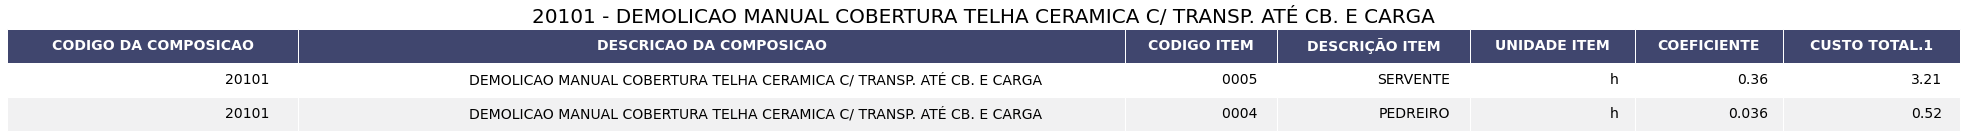

In [44]:
composicao = goinfra_analitica[goinfra_analitica['CODIGO DA COMPOSICAO'] == codigo]
helpers.render_table(composicao, title=titulo)

A seguir, os arquivos tratados foram exportados para o formato xlsx.

In [58]:
datasets = [goinfra_sintetica, goinfra_analitica, sinapi_sintetica, sinapi_analitica]
exported_files = ["goinfra-sintetica-11.2020.xlsx", "goinfra-analitica-11.2020.xlsx", 
                  "sinapi-sintetica-12.2020.xlsx", "sinapi-analitica-12.2020.xlsx"]

for i, dataset in enumerate(datasets):
    dataset.to_excel(exported_files[i])

# 4 Conclusão <a id="conclusion"></a>

<div style="text-align:justify;">
Três arquivos foram obtidos através das fontes oficiais: composições sintéticas e analíticas GOINFRA NOV/2020 e analíticas SINAPI DEZ/2020. Foi possível constatar uma quantidade significativa de dados nulos nas tabelas da GOINFRA, o que demandou um tratamento através da exclusão dessas linhas. Houve ainda a eliminação de diversas colunas nulas, cuja existência se deve à mesclagem de células no excel. Além disso, foi necessário efetuar conversão na coluna de códigos da tabela sintética de 'object' para 'int'.
</div>

<div style="text-align:justify;">
A tabela sintética da SINAPI foi obtida a partir da analítica. Na tabela sintética, foi efetuada uma segmentação das colunas, de modo a incluir apenas as colunas de código, descrição, unidade e custo total. A seguir, foi efetuada uma remoção de valores duplicados, totalizando 6813 registros. A coluna de custo total foi convertida para o tipo 'float'.
</div>

<div style="text-align:justify;">
De forma semelhante à sintética, a tabela analítica sofreu segmentação de colunas. Foram incluídas apenas as colunas de códigos da composição e item, descrição, unidade, coeficiente, preço unitário e custo total. Linhas com códigos nulos foram removidas e foi efetuada conversão do código do item para int e dos preço e custo para float.
</div>

<div style="text-align:justify;">
O tratamento aplicado aos dados pode ser reproduzido com a publicação de novas tabelas de referência.
</div>